In [83]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [84]:
main_config = {
    "hovermode": "x unified",
    "legend": {"yanchor":"top", 
                "y":0.9, 
                "xanchor":"left",
                "x":0.1,
                "title": {"text": None},
                "font" :{"color":"white"},
                "bgcolor": "rgba(0,0,0,0.5)"},
    "margin": {"l":0, "r":0, "t":20, "b":0}
}

In [85]:
df = pd.read_csv('dataset_asimov.csv')

In [86]:
df

,Status de Pagamento,Dia,Mês,Meio de Propaganda,Valor Pago,Chamadas Realizadas,Duração da chamada,Modelo de Treinamento,Nivel de Treinamento,Código de Área,Equipe,Consultor
0,Pago,1,Abr,Televisão,R$ 7000000,3,02:00,GK,KJI. L4,A7,Equipe 1,Arthur
1,Pago,10,Ago,Televisão,R$ 11000000,1,02:00,GK,Pre. L8,B13,Equipe 2,Heitor
2,Pago,20,Set,Website,R$ 12000000,3,02:00,GK,Fndn. L5,A1,Equipe 2,Helena
3,Pago,23,Set,Facebook,R$ 15000000,1,02:00,GK,Fndn. L5,A2,Equipe 3,Alice
4,Pago,11,Set,Televisão,R$ 25000000,2,02:00,GK,Fndn. L3,B13,Equipe 4,Theo
...,...,...,...,...,...,...,...,...,...,...,...,...
1232,Não pago,18,Nov,Facebook,R$ 0,2,12:55,NaN,NaN,A1,Equipe 4,Theo
1233,Não pago,24,Nov,WhatsApp,R$ 0,2,12:55,NaN,NaN,A7,Equipe 2,Heitor
1234,Não pago,9,Dez,Televisão,R$ 0,1,12:55,NaN,NaN,A4,Equipe 2,Laura
1235,Não pago,11,Fev,Facebook,R$ 0,2,12:55,NaN,NaN,B18,Equipe 2,Laura


In [87]:
df.loc[ df['Mês'] == 'Jan', 'Mês'] = 1
df.loc[ df['Mês'] == 'Fev', 'Mês'] = 2
df.loc[ df['Mês'] == 'Mar', 'Mês'] = 3
df.loc[ df['Mês'] == 'Abr', 'Mês'] = 4
df.loc[ df['Mês'] == 'Mai', 'Mês'] = 5
df.loc[ df['Mês'] == 'Jun', 'Mês'] = 6
df.loc[ df['Mês'] == 'Jul', 'Mês'] = 7
df.loc[ df['Mês'] == 'Ago', 'Mês'] = 8
df.loc[ df['Mês'] == 'Set', 'Mês'] = 9
df.loc[ df['Mês'] == 'Out', 'Mês'] = 10
df.loc[ df['Mês'] == 'Nov', 'Mês'] = 11
df.loc[ df['Mês'] == 'Dez', 'Mês'] = 12

In [88]:
df['Chamadas Realizadas'] = df['Chamadas Realizadas'].astype(int)
df['Dia'] = df['Dia'].astype(int)
df['Mês'] = df['Mês'].astype(int)

df['Valor Pago'] = df['Valor Pago'].str.lstrip('R$ ')
df['Valor Pago'] = df['Valor Pago'].astype(int)

In [89]:
df.loc[df['Status de Pagamento'] == 'Pago', 'Status de Pagamento'] = 1
df.loc[df['Status de Pagamento'] == 'Não pago', 'Status de Pagamento'] = 0

In [90]:
df['Status de Pagamento'] = df['Status de Pagamento'].astype(int)

#### Vendas por equipe

In [91]:
df1 = df.groupby('Equipe')['Valor Pago'].sum().reset_index()

In [92]:
df1

,Equipe,Valor Pago
0,Equipe 1,5288000000
1,Equipe 2,5372000000
2,Equipe 3,2579000000
3,Equipe 4,2751000000


In [93]:
fig1 = go.Figure(go.Bar(
        x=df1['Valor Pago'],
        y=df1['Equipe'],
        orientation='h',
        textposition='auto',
        text=df1['Valor Pago'],
        insidetextfont=dict(family='Times', size=12)))

In [94]:
fig1.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

#### Chamadas médias por dia do mês

In [ ]:
df2 = df.groupby('Dia')['Chamadas Realizadas'].sum().reset_index()

In [ ]:
fig2 = go.Figure(go.Scatter(
    x=df2['Dia'], y=df2['Chamadas Realizadas'], mode='lines', fill='tonexty'))

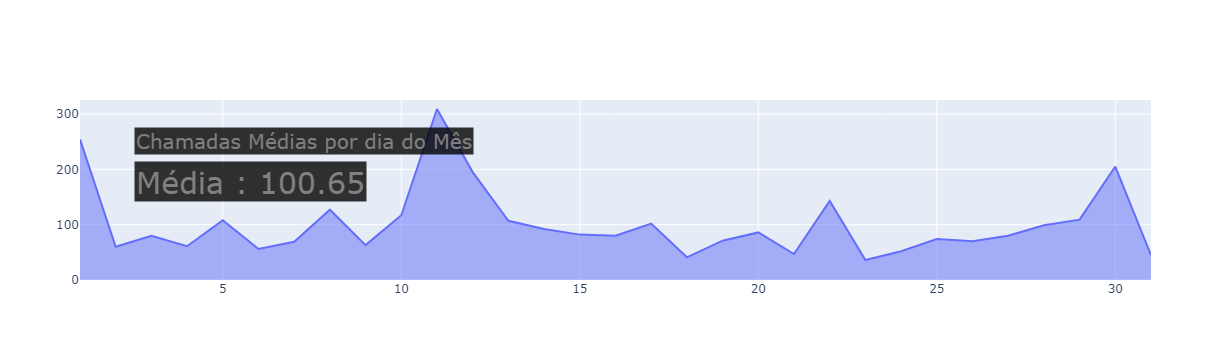

In [ ]:
fig2.add_annotation(text='Chamadas Médias por dia do Mês',
        xref="paper", yref="paper",
        font=dict(
            size=20,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.85, showarrow=False)
fig2.add_annotation(text=f"Média : {round(df2['Chamadas Realizadas'].mean(), 2)}",
        xref="paper", yref="paper",
        font=dict(
            size=30,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.55, showarrow=False)

#### Chamadas médias por mês

In [ ]:
df4 = df.groupby('Mês')['Chamadas Realizadas'].sum().reset_index()

In [ ]:
df4

,Mês,Chamadas Realizadas
0,1,168
1,2,164
2,3,70
3,4,66
4,5,180
5,6,108
6,7,106
7,8,211
8,9,470
9,10,715


In [ ]:
fig4 = go.Figure(go.Scatter(
    x=df4['Mês'], y=df4['Chamadas Realizadas'], mode='lines', fill='tonexty'))

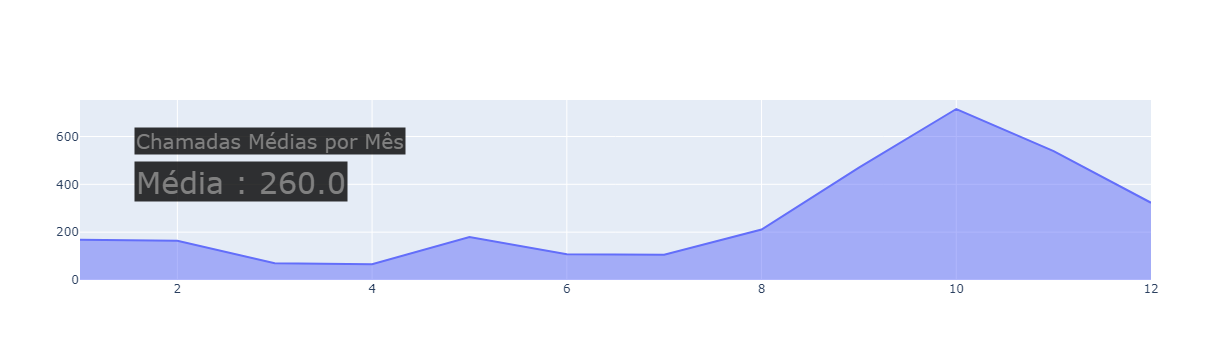

In [ ]:
fig4.add_annotation(text='Chamadas Médias por Mês',
        xref="paper", yref="paper",
        font=dict(
            size=20,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.85, showarrow=False)
fig4.add_annotation(text=f"Média : {round(df4['Chamadas Realizadas'].mean(), 2)}",
        xref="paper", yref="paper",
        font=dict(
            size=30,
            color='gray'
            ),
        align="center", bgcolor="rgba(0,0,0,0.8)",
        x=0.05, y=0.55, showarrow=False)

#### Valores pagos por meio de propaganda

In [ ]:
df3 = df.groupby(['Meio de Propaganda', 'Mês'])['Valor Pago'].sum().reset_index()

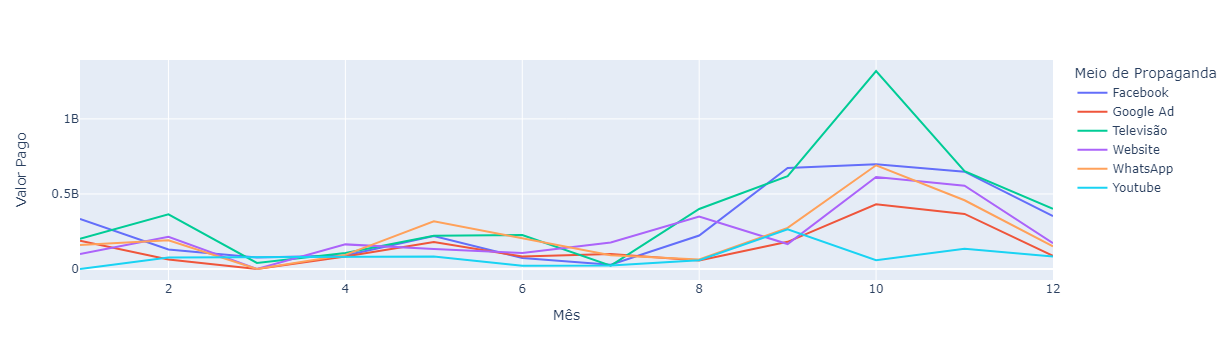

In [ ]:
fig3 = px.line(df3, y="Valor Pago", x="Mês", color="Meio de Propaganda")
fig3.show()

#### Propaganda em PieChart // talvez botar no msm card

In [ ]:
df11 = df.groupby('Meio de Propaganda')['Valor Pago'].sum().reset_index()

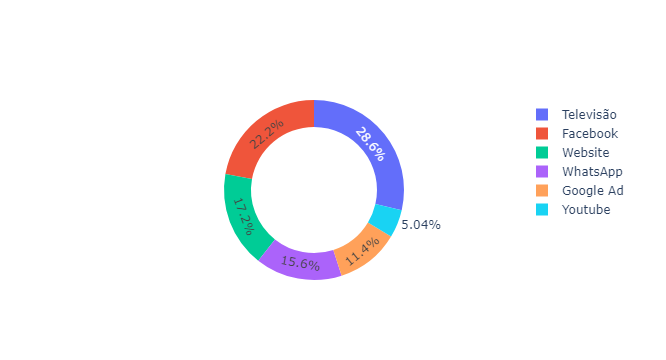

In [ ]:
fig11 = go.Figure()
fig11.add_trace(go.Pie(labels=df11['Meio de Propaganda'], values=df11['Valor Pago'], hole=.7))

#### Ganhos por Mês + segregação por equipe

In [ ]:
df.columns

Index(['Status de Pagamento', 'Dia', 'Mês', 'Meio de Propaganda', 'Valor Pago',
       'Chamadas Realizadas', 'Duração da chamada', 'Modelo de Treinamento',
       'Nivel de Treinamento', 'Código de Área', 'Equipe', 'Consultor'],
      dtype='object')

In [ ]:
df5 = df.groupby(['Mês', 'Equipe'])['Valor Pago'].sum().reset_index()
df5_group = df.groupby('Mês')['Valor Pago'].sum().reset_index()

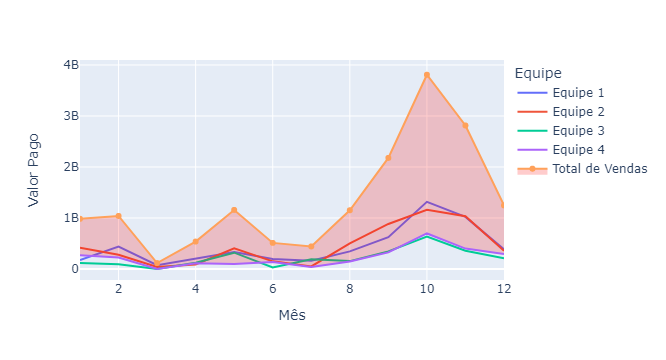

In [ ]:
fig5 = px.line(df5, y="Valor Pago", x="Mês", color="Equipe")
fig5.add_trace(go.Scatter(y=df5_group["Valor Pago"], x=df5_group["Mês"], mode='lines+markers', fill='tonexty', fillcolor='rgba(255, 0, 0, 0.2)', name='Total de Vendas'))
fig5.show()

#### Pagos e não pagos

In [ ]:
df6 = df.groupby('Status de Pagamento')['Chamadas Realizadas'].sum()

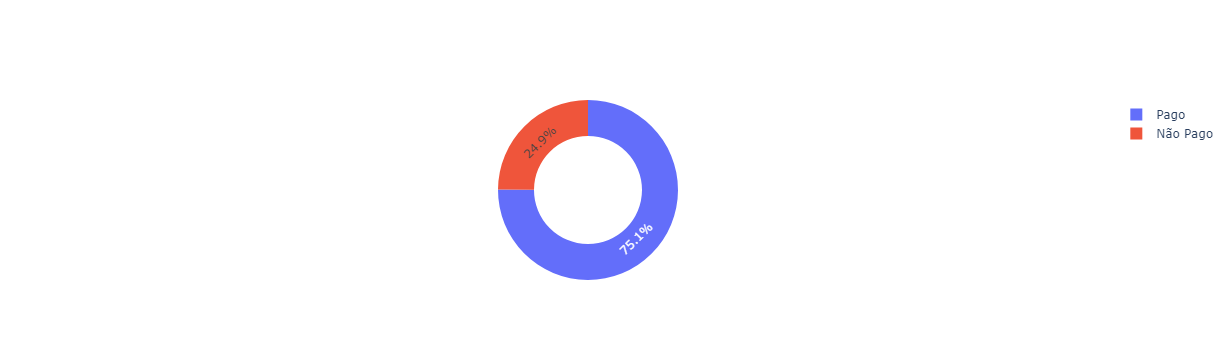

In [ ]:
fig6 = go.Figure()
fig6.add_trace(go.Pie(labels=['Não Pago', 'Pago'], values=df6, hole=.6))
fig6.show()

## INDICATORS

#### Indicators - Melhor consultor

In [ ]:
df7 = df.groupby(['Consultor', 'Equipe'])['Valor Pago'].sum()

In [ ]:
df7.sort_values(ascending=False, inplace=True)

In [ ]:
df7 = df7.reset_index()

In [ ]:
df7

,Consultor,Equipe,Valor Pago
0,Laura,Equipe 2,1727000000
1,Helena,Equipe 2,1626000000
2,Bernardo,Equipe 4,1534000000
3,Lorenzo,Equipe 1,1320000000
4,Heitor,Equipe 2,1276000000
5,Sophia,Equipe 3,1205000000
6,Theo,Equipe 4,1177000000
7,Davi,Equipe 1,1066000000
8,Lucas,Equipe 1,1029000000
9,João,Equipe 3,995000000


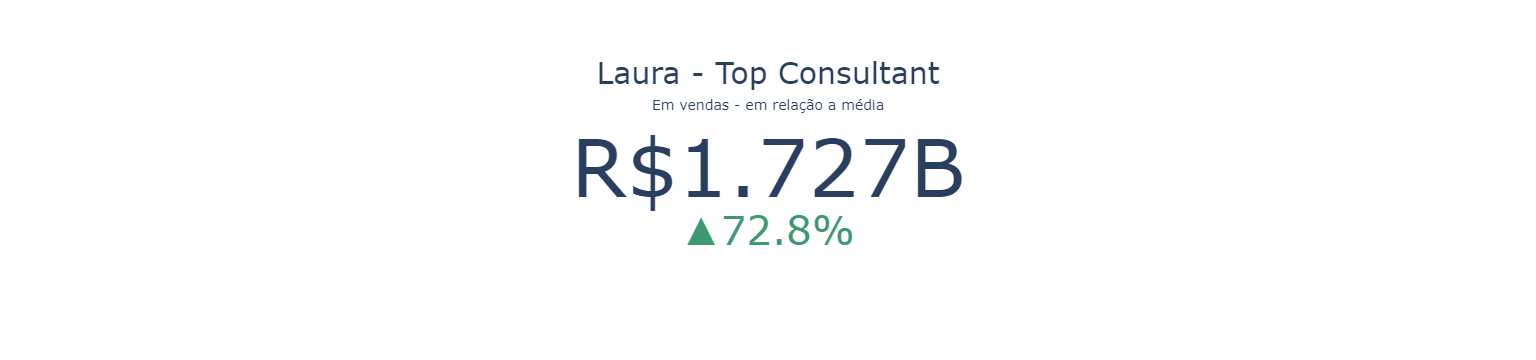

In [ ]:
fig7 = go.Figure()
fig7.add_trace(go.Indicator(mode='number+delta',
        title = {"text": f"<span style='font-size:150%'>{df7['Consultor'].iloc[0]} - Top Consultant</span><br><span style='font-size:70%'>Em vendas - em relação a média</span><br>"},
        value = df7['Valor Pago'].iloc[0],
        number = {'prefix': "R$"},
        delta = {'relative': True, 'valueformat': '.1%', 'reference': df7['Valor Pago'].mean()}
))

##### Nesses cards de indicador, mostrar abaixo os valores dos top 5 - Equipes, Consultores

#### Indicators - Melhor Equipe

In [ ]:
df8 = df.groupby('Equipe')['Valor Pago'].sum()

In [ ]:
df8.sort_values(ascending=False, inplace=True)

In [ ]:
df8 = df8.reset_index()

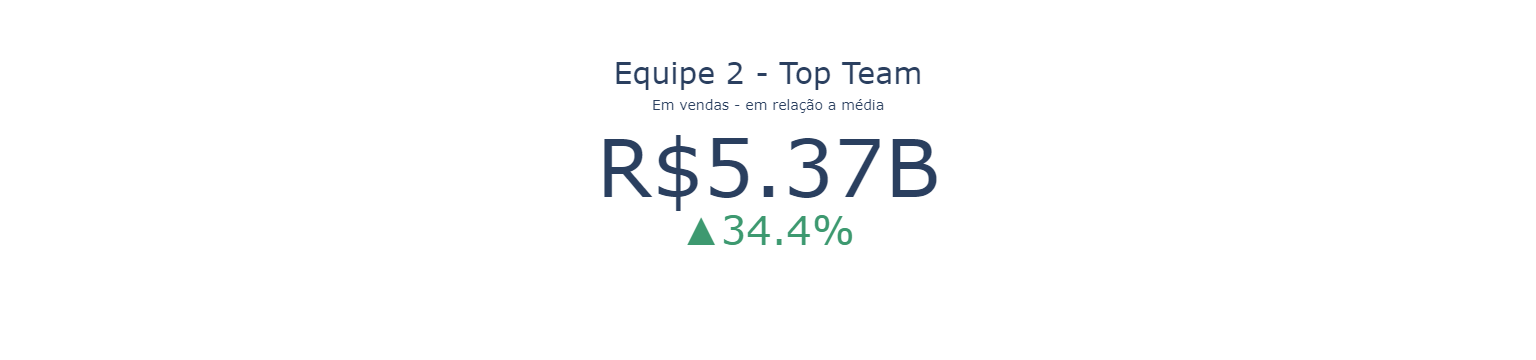

In [ ]:
fig8 = go.Figure()
fig8.add_trace(go.Indicator(mode='number+delta',
        title = {"text": f"<span style='font-size:150%'>{df8['Equipe'].iloc[0]} - Top Team</span><br><span style='font-size:70%'>Em vendas - em relação a média</span><br>"},
        value = df8['Valor Pago'].iloc[0],
        number = {'prefix': "R$"},
        delta = {'relative': True, 'valueformat': '.1%', 'reference': df8['Valor Pago'].mean()}
))

#### Indicators - Ganhos Totais

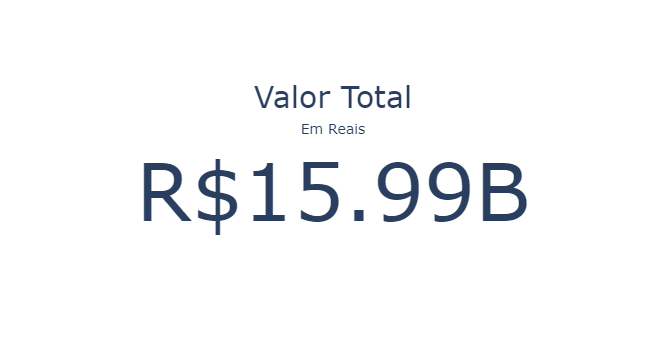

In [ ]:
fig9 = go.Figure()
fig9.add_trace(go.Indicator(mode='number',
        title = {"text": f"<span style='font-size:150%'>Valor Total</span><br><span style='font-size:70%'>Em Reais</span><br>"},
        value = df['Valor Pago'].sum(),
        number = {'prefix': "R$"}
))

#### Indicators - Total de Chamadas

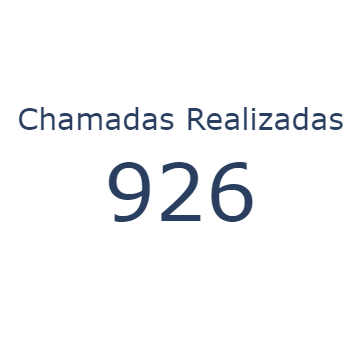

In [ ]:
fig10 = go.Figure()
fig10.add_trace(go.Indicator(mode='number',
        title = {"text": f"<span style='font-size:150%'>Chamadas Realizadas</span>"},
        value = len(df[df['Status de Pagamento'] == 1])
))

#### Top Consultant per Equipa e seus valores de venda

In [ ]:
df12 = df.groupby(['Equipe', 'Consultor'])['Valor Pago'].sum().reset_index()

In [ ]:
df13 = df.groupby(['Equipe', 'Consultor'])['Valor Pago'].sum()

In [ ]:
df13 = df13.sort_values(ascending=False)

In [ ]:
df13 = df13.groupby('Equipe').head(1).reset_index()

In [ ]:
df13

,Equipe,Consultor,Valor Pago
0,Equipe 2,Laura,1727000000
1,Equipe 4,Bernardo,1534000000
2,Equipe 1,Lorenzo,1320000000
3,Equipe 3,Sophia,1205000000


#### Top consultores + equipe por valor - PieChart

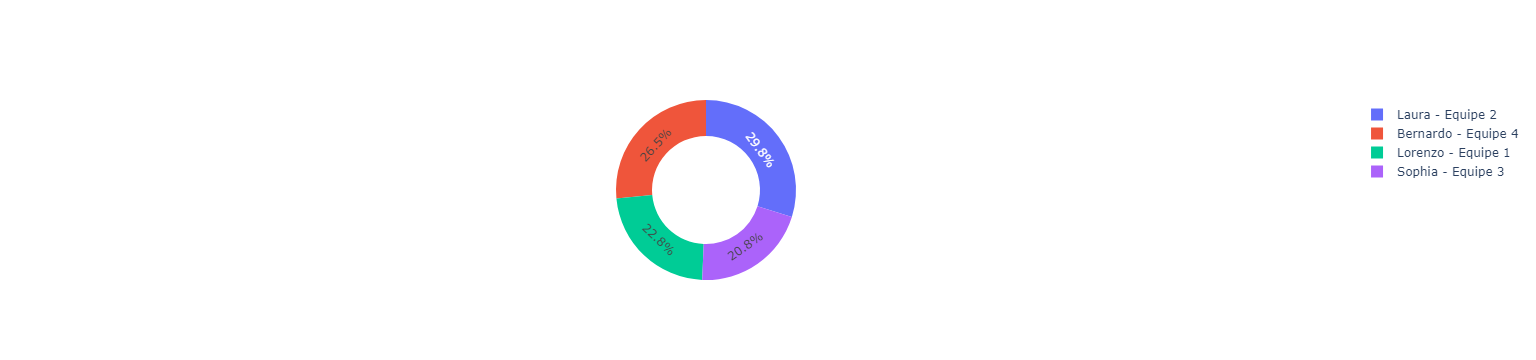

In [ ]:
fig13 = go.Figure(go.Pie(labels=df13['Consultor'] + ' - ' + df13['Equipe'], values=df13['Valor Pago'], hole=.6))
fig13.show()

#### Top consultores + equipe por valor - BarChart

In [ ]:
fig14 = go.Figure(go.Bar(x=df13['Consultor'], y=df13['Valor Pago'], textposition='auto', text=df13['Valor Pago']))

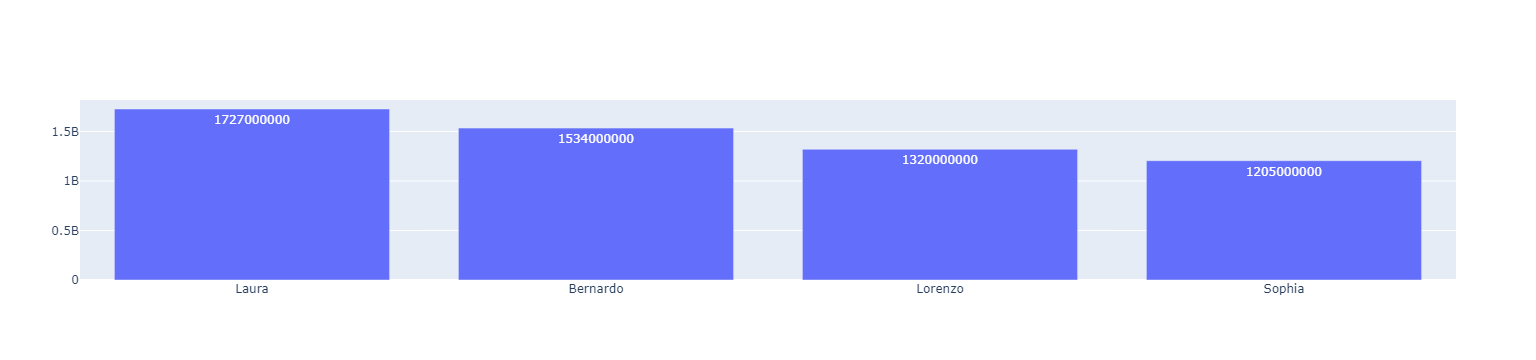

In [ ]:
fig14.show()

fig6.add_trace(go.Pie(labels=['Não Pago', 'Pago'], values=df6, hole=.6))
go.Bar(
        x=df1['Valor Pago'],
        y=df1['Equipe'],
        orientation='h',
        textposition='auto',
        text=df1['Valor Pago'],
        insidetextfont=dict(family='Times', size=12)))